In [1]:
import numpy as np
import nmresearch as nmr
import matplotlib.pyplot as plt
from pfapack import pfaffian as pfa
import scipy as sp
import pickle

from timeit import default_timer as timer

In [2]:
n=30

In [4]:
dq = nmr.Operator.double_quantum(n)
Z = nmr.Operator.global_Z(n)
time_evo = nmr.Unitary(dq,.05, 2.05)

In [5]:
center = int(n/2)
pauli_pairs = [["X","X"], ["Y","Y"], ["Z","Z"]]

In [6]:
def d_weight(pauli):
    weight = 1
    if pauli[0] != "Z":
        weight *= -.5
    if pauli[2] != "Z":
        weight *= -.5
    return weight

In [8]:
start = timer()
dip_corr_nn = np.zeros(len(time_evo.t))
for a in range(n-1):
    for c in range(n-1):
        val = np.zeros(len(time_evo.t),dtype=np.complex128)
        for pair1 in pauli_pairs:
            for pair2 in pauli_pairs:
                term = pair1+pair2
                pstring = nmr.PauliString(term, [a,a+1,c,c+1], [True,True,False,False])
                val = val +  (d_weight(term) * time_evo.pauli_string_expectation(pstring))
        dip_corr_nn = dip_corr_nn + (2/(1**3)) * (2/(1**3)) * val
end = timer()
print(end-start)

6648.1795228


C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


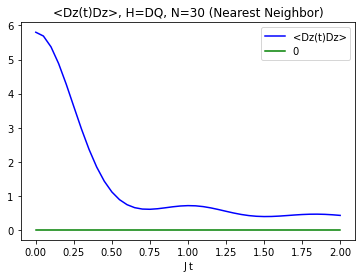

In [9]:
fig, ax = plt.subplots()
ax.set_title('<Dz(t)Dz>, H=DQ, N=30 (Nearest Neighbor)')
c = ax.plot(time_evo.t, [sig/n for sig in dip_corr_nn],'b', time_evo.t, [0 for _ in dip_corr_nn], 'g')
ax.legend(['<Dz(t)Dz>', '0'])
ax.set_xlabel('J t')
plt.savefig("DzDz_tpc.png")
plt.show()

In [10]:
with open('dzdz_nn_tpc.dat', 'wb') as fi:
    pickle.dump(dip_corr_nn, fi)

In [16]:
start = timer()
dip_corr_nnn = np.zeros(len(time_evo.t))
for a in range(n-2):
    for c in range(n-2):
        val = np.zeros(len(time_evo.t),dtype=np.complex128)
        for pair1 in pauli_pairs:
            for pair2 in pauli_pairs:
                term = pair1+pair2
                pstring = f.PauliString(term, [a,a+2,c,c+2], [True,True,False,False])
                val = val +  (d_weight(term) * time_evo.pauli_string_expectation(pstring))
        dip_corr_nnn = dip_corr_nnn + (2/(2**3)) * (2/(2**3)) * val
end = timer()
print(end-start)

3435.230947799999


In [18]:
with open('dzdz_nnn_tpc.dat', 'wb') as fi:
    pickle.dump(dip_corr_nnn, fi)

In [6]:
start = timer()
dip_corr_snn1 = np.zeros(len(time_evo.t))
for a in range(n-2):
    for c in range(n-1):
        val = np.zeros(len(time_evo.t),dtype=np.complex128)
        for pair1 in pauli_pairs:
            for pair2 in pauli_pairs:
                term = pair1+pair2
                pstring = f.PauliString(term, [a,a+2,c,c+1], [True,True,False,False])
                val = val +  (d_weight(term) * time_evo.pauli_string_expectation(pstring))
        dip_corr_snn1 = dip_corr_snn1 + (2/(1**3)) * (2/(2**3)) * val
end = timer()
print(end-start)

3650.7571033


In [7]:
start = timer()
dip_corr_snn2 = np.zeros(len(time_evo.t))
for a in range(n-1):
    for c in range(n-2):
        val = np.zeros(len(time_evo.t),dtype=np.complex128)
        for pair1 in pauli_pairs:
            for pair2 in pauli_pairs:
                term = pair1+pair2
                pstring = f.PauliString(term, [a,a+1,c,c+2], [True,True,False,False])
                val = val +  (d_weight(term) * time_evo.pauli_string_expectation(pstring))
        dip_corr_snn2 = dip_corr_snn2 + (2/(1**3)) * (2/(2**3)) * val
end = timer()
print(end-start)

3539.1046917999997


In [8]:
dip_corr_snn = [val1+val2 for val1,val2 in zip(dip_corr_snn1, dip_corr_snn2)]

In [11]:
with open('dzdz_snn_tpc.dat', 'wb') as fi:
    pickle.dump(dip_corr_snn, fi)

In [ ]:
with open('dzdz_nn_tpc.dat', 'rb') as fi:
    dip_corr_nn = pickle.load(fi)

In [26]:
with open('dzdz_nnn_tpc.dat', 'rb') as fi:
    dip_corr_nnn = pickle.load(fi)

In [ ]:
with open('dzdz_snn_tpc.dat', 'rb') as fi:
    dip_corr_snn = pickle.load(fi)

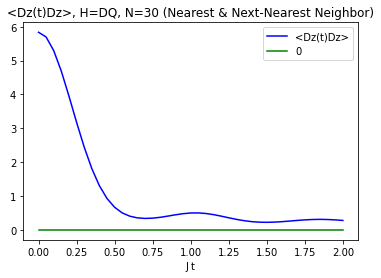

In [27]:
fig, ax = plt.subplots()
ax.set_title('<Dz(t)Dz>, H=DQ, N=30 (Nearest & Next-Nearest Neighbor)')
c = ax.plot(time_evo.t, [(v1+v2+v3)/n for v1,v2,v3 in zip(dip_corr_nn, dip_corr_nnn, dip_corr_snn)],'b', time_evo.t, [0 for _ in dip_corr_nn], 'g')
ax.legend(['<Dz(t)Dz>', '0'])
ax.set_xlabel('J t')
plt.savefig("DzDz_tpc.png")
plt.show()

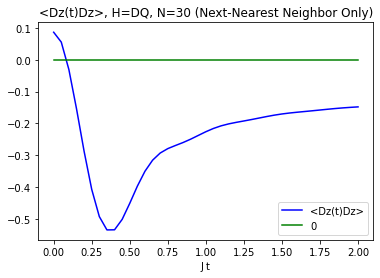

In [28]:
fig, ax = plt.subplots()
ax.set_title('<Dz(t)Dz>, H=DQ, N=30 (Next-Nearest Neighbor Only)')
c = ax.plot(time_evo.t, [(v1+v2)/n for v1,v2 in zip(dip_corr_nnn, dip_corr_snn)],'b', time_evo.t, [0 for _ in dip_corr_nn], 'g')
ax.legend(['<Dz(t)Dz>', '0'])
ax.set_xlabel('J t')
plt.savefig("DzDz_tpc_nnn.png")
plt.show()

In [13]:
a = int(n/2)
c = int(n/2)
test = np.zeros(len(time_evo.t),dtype=np.complex128)
for c in range(n-1):
    val = np.zeros(len(time_evo.t),dtype=np.complex128)
    for pair1 in pauli_pairs:
        for pair2 in pauli_pairs:
            term = pair1+pair2
            pstring = nmr.PauliString(term, [a,a+1,c,c+1], [True,True,False,False])
            val = val +  (d_weight(term) * time_evo.pauli_string_expectation(pstring))
    test = test + (2/(1**3)) * (2/(1**3)) * val

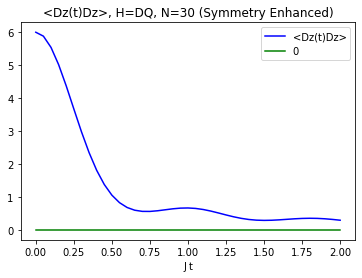

In [14]:
fig, ax = plt.subplots()
ax.set_title('<Dz(t)Dz>, H=DQ, N=30 (Symmetry Enhanced)')
c = ax.plot(time_evo.t, test,'b', time_evo.t, [0 for _ in dip_corr_nn], 'g')
ax.legend(['<Dz(t)Dz>', '0'])
ax.set_xlabel('J t')
plt.savefig("DzDz_tpc_sym.png")
plt.show()